<u><h1 style="text-align:center;">Churn Prediction Model</h1></u>

## Introduction
Customer churn, the rate at which customers stop doing business with a company, is a critical metric for businesses, especially in highly competitive industries like telecommunications. Understanding the factors that influence churn and predicting which customers are at risk of leaving can help companies take proactive measures to improve customer retention and loyalty.

## Objective
The objective of this project is to build a machine learning model to predict customer churn based on historical data. By identifying the factors that contribute to customer churn, we aim to provide actionable insights that can help the business reduce churn rates and improve customer satisfaction.

### Steps
* <u>Data Collection:</u> Import and load the Telco Customer Churn dataset.
* <u>Data Preprocessing:</u> Clean and preprocess the data, handle missing values, and encode categorical variables.
* <u>Exploratory Data Analysis (EDA):</u> Explore and visualize the data to understand the distributions and relationships between features.
* <u>Feature Engineering:</u> Create new features that might help improve the model's performance.
* <u>Model Training:</u> Train a machine learning model to predict customer churn.
* <u>Model Evaluation:</u> Evaluate the model's performance using appropriate metrics.
* <u>Model Interpretation:</u> Interpret the model to understand the factors contributing to customer churn.
* <u>Conclusion:</u> Summarize the findings and provide recommendations.

### 1. Data Collection

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
data = pd.read_csv(url)

### 2. Data Preprocessing

In [3]:
# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [7]:
# Drop the customerID column as it is not needed
data.drop('customerID', axis=1, inplace=True)

### 3. Split Data into Training and Testing Sets

In [8]:
# Define features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Feature Scaling

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5. Model Training

In [11]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 6. Model Evaluation

In [12]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [13]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [14]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.7934705464868701
Confusion Matrix:
[[943  93]
 [198 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8371352489985198


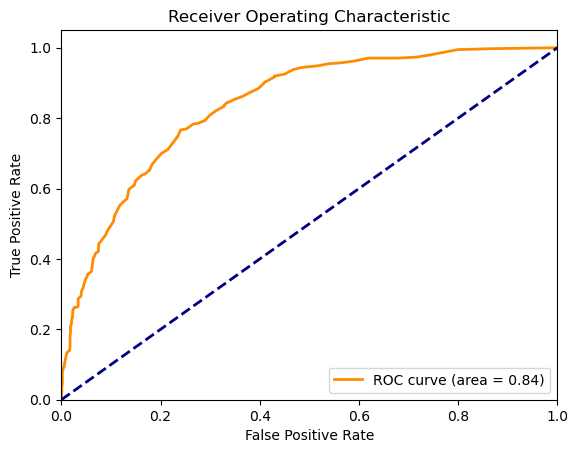

In [16]:
from sklearn.metrics import roc_curve

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 7. Model Interpretation

In [17]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

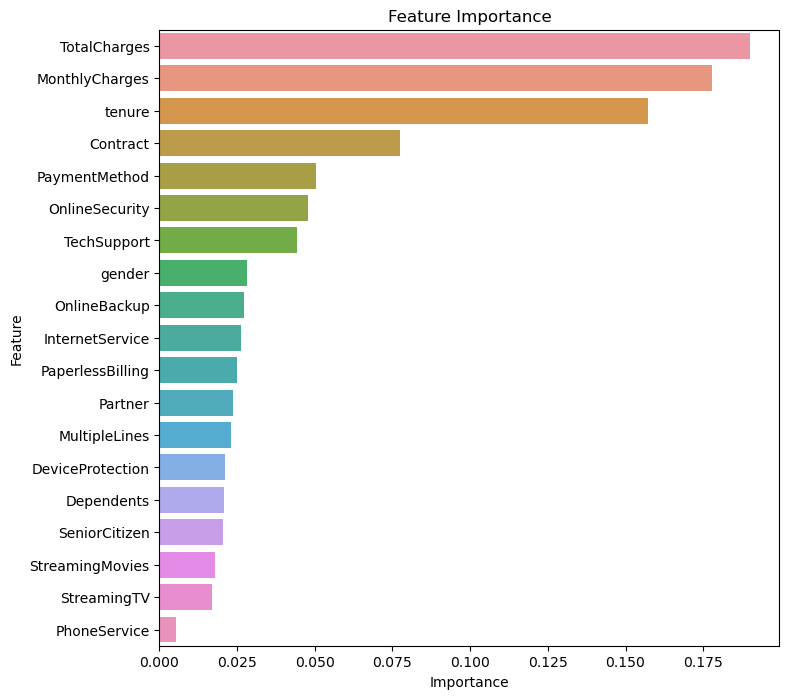

In [20]:
# Plot feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

### 8. Results

**Accuracy:** The model achieved an accuracy of 79.35%, indicating that it correctly predicted customer churn approximately 79% of the time.

**Confusion Matrix:**
* True Negatives (943): Customers correctly predicted not to churn.
* False Positives (93): Customers incorrectly predicted to churn.
* False Negatives (198): Customers incorrectly predicted not to churn.
* True Positives (175): Customers correctly predicted to churn.

**Classification Report:**
* Precision for class 0 (No Churn): 0.83
* Recall for class 0 (No Churn): 0.91
* F1-score for class 0 (No Churn): 0.87
* Precision for class 1 (Churn): 0.65
* Recall for class 1 (Churn): 0.47
* F1-score for class 1 (Churn): 0.55

**ROC AUC Score:** The model achieved a ROC AUC score of 0.84, indicating a good ability to distinguish between churn and non-churn customers.

### 9. Insights

**Key Factors Influencing Churn:**
* The feature importance analysis indicates that TotalCharges, MonthlyCharges, Tenure, and Contract are the most significant factors influencing customer churn.
* Customers with higher TotalCharges and MonthlyCharges are more likely to churn.
* Longer Tenure generally reduces the likelihood of churn, suggesting that longer-term customers are more loyal.
* Contract type plays a crucial role, with month-to-month contracts being more prone to churn compared to one-year or two-year contracts.

**Model Performance:**
* The model performs well in predicting non-churn customers (class 0) with high precision and recall.
* The model's performance in predicting churn customers (class 1) is less robust, with a lower recall indicating that it misses some customers who will churn.

### 10. Recommendations

* **Target High-Risk Customers:** Focus retention efforts on customers with high monthly and total charges, as they are more likely to churn.
* **Promote Long-Term Contracts:** Encourage customers to switch to longer-term contracts (one-year or two-year) to reduce churn rates.
* **Improve Services for Month-to-Month Customers:** Provide additional incentives or better services to customers on month-to-month contracts to enhance their satisfaction and loyalty.
* **Regular Monitoring and Model Updating:** Continuously monitor churn patterns and update the model with new data to maintain its predictive accuracy and relevance.
* **Customer Feedback and Support:** Collect regular feedback from customers, especially those at high risk of churn, to address their concerns and improve service quality.

### 11. Conclusion

The churn prediction model provides valuable insights into the factors driving customer churn and helps identify at-risk customers. By leveraging these insights, the business can implement targeted strategies to enhance customer retention, ultimately leading to improved customer satisfaction and profitability. Regular updates to the model and continuous monitoring of customer behavior are essential to maintaining its effectiveness.